**PART 1**

Introduction about the project:

Here we have a list of countries by their population-2020.Data based on the latest United Nations Population Division estimates. There are 235 countries along with their population. And there are 11 columns each representing different features of countries.

Attributes:



1. Country (or dependency):Name of countries and dependent       territories.
2. Population (2020): Population in the year 2020
3. Yearly Change: Yearly Change in Population
4. Net Change: Net Change in Population
5. Density (P/Km²): Population density (population per square km)
6. Land Area (Km²): Land area of countries / dependent territories.
7. Migrants (net): Total number of migrants
8. Fert. Rate: Fertility rate
9. Med. Age: Median age of the population
10. Urban Pop %: Percentage of urban population
11. World Share: Population share



**QUESTIONS AND ANSWERS**

1. Please scrape the table properly using BeautifulSoup.

In [ ]:
import pandas as pd # importing pandas library
import requests # importing requests library
from bs4 import BeautifulSoup # importing BeautifulSoup library

res = requests.get("https://www.worldometers.info/world-population/population-by-country/") # this is my html url
soup = BeautifulSoup(res.content,'html') # to retrieve the content from html link
table = soup.find_all('table')[0] # reterieving table content
df = pd.read_html(str(table))[0] # converting that table into dataframe by using pandas
df.head() # this is my dataframe


,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Honduras,9904607,1.63 %,158490,89,111890,-6800.0,2.5,24,57 %,0.13 %
1,2,United Arab Emirates,9890402,1.23 %,119873,118,83600,40000.0,1.4,33,86 %,0.13 %
2,3,Djibouti,988000,1.48 %,14440,43,23180,900.0,2.8,27,79 %,0.01 %
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
4,5,Seychelles,98347,0.62 %,608,214,460,-200.0,2.5,34,56 %,0.00 %


2. Once the table is scraped, perform some basic data cleaning steps. 



In [ ]:
df.info() # to get the info about the dataframe
df.isnull().sum() # checking and counting the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    int64  
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        235 non-null    int64  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.2+ KB


#                           0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

By looking at above output, I can say few things.

1. I have some special characters in the column names.I will remove those.
1. Country is object type. So I will change that into String.
2. There are few missing values, as mentioned in the project(do not fill it or remove it).I will ignore them.

Now let's remove the special characters first

In [ ]:
df.columns = df.columns.str.replace('[#,@,&]', '') # removing special symbols from the column names
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Honduras,9904607,1.63 %,158490,89,111890,-6800.0,2.5,24,57 %,0.13 %
1,2,United Arab Emirates,9890402,1.23 %,119873,118,83600,40000.0,1.4,33,86 %,0.13 %
2,3,Djibouti,988000,1.48 %,14440,43,23180,900.0,2.8,27,79 %,0.01 %
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
4,5,Seychelles,98347,0.62 %,608,214,460,-200.0,2.5,34,56 %,0.00 %


Now let’s change the type of country column

In [ ]:
df['Country (or dependency)'] = df['Country (or dependency)'].astype('string') # changing object type to string type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0                            235 non-null    int64  
 1   Country (or dependency)  235 non-null    string 
 2   Population (2020)        235 non-null    int64  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), int64(5), object(5), string(1)
memory usage: 22.2+ KB


3. Please report number of rows and columns







In [ ]:
df.shape # to get the number of rows and columns.

(235, 12)

4. Please report if there is any missing value in the dataset. (Do not remove or fill it)



In [ ]:
df.isnull().sum() # to get the no.of missing values in each column

                            0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

By looking at the above output migrants have 34 missing values.

5. Please rename the columns appropriately.



In [ ]:
df.rename(columns={'': 'no', 'Country (or dependency)': 'country(dependency)', 'Population (2020)':'population(2020)',
                   'Yearly Change':'yearly_change', 'Net Change':'net_change', 'Density (P/Km²)':'density(p/km²)',
                   'Land Area (Km²)':'land_area(km²)', 'Migrants (net)':'migrants(net)', 'Fert. Rate':'fert_rate', 'Med. Age':'med_age', 'Urban Pop %':'urban_pop(%)','World Share':'world_share'}, inplace=True)
df.head()

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
0,1,Honduras,9904607,1.63 %,158490,89,111890,-6800.0,2.5,24,57 %,0.13 %
1,2,United Arab Emirates,9890402,1.23 %,119873,118,83600,40000.0,1.4,33,86 %,0.13 %
2,3,Djibouti,988000,1.48 %,14440,43,23180,900.0,2.8,27,79 %,0.01 %
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
4,5,Seychelles,98347,0.62 %,608,214,460,-200.0,2.5,34,56 %,0.00 %


6. Please report the top ten and bottom ten countries based on the density column.



In [ ]:
countries = df.sort_values(by='density(p/km²)',ascending=False) # sorting the values based on density column
countries.head(10) # top 10 countries


,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
102,103,Monaco,39242,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
43,44,Macao,649335,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
56,57,Singapore,5850342,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
29,30,Hong Kong,7496981,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
117,118,Gibraltar,33691,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
182,183,Bahrain,1701575,3.68 %,60403,2239,760,47800.0,2.0,32,89 %,0.02 %
24,25,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
69,70,Maldives,540544,1.81 %,9591,1802,300,11370.0,1.9,30,35 %,0.01 %
87,88,Malta,441543,0.27 %,1171,1380,320,900.0,1.5,43,93 %,0.01 %
186,187,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %


This is visual representation of the above quesion

<BarContainer object of 10 artists>

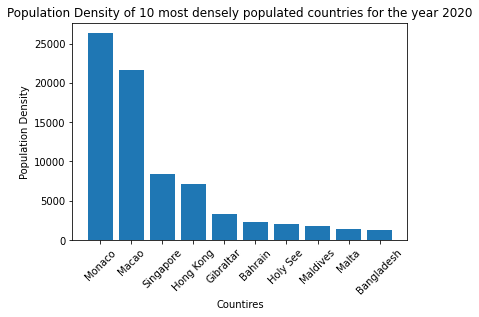

In [ ]:
import numpy as np # as required
top10 = df.sort_values('density(p/km²)', ascending = False).head(10) # sorting the values
plt.xticks(rotation = '45')
plt.title('Population Density of 10 most densely populated countries for the year 2020') # title of the graph
plt.xlabel('Countires') # x-label
plt.ylabel('Population Density') # y-label
plt.bar(top10['country(dependency)'],
        top10['density(p/km²)']
        ) # to show the top 10 countries 

In [ ]:
countries.tail(10) # to get bottom 10 countries

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,Urban Pop %,world_share
154,155,Botswana,2351627,2.08 %,47930,4,566730,3000.0,2.9,24,73 %,0.03 %
129,130,French Guiana,298682,2.70 %,7850,4,82200,1200.0,3.4,25,87 %,0.00 %
150,151,Namibia,2540905,1.86 %,46375,3,823290,-4806.0,3.4,22,55 %,0.03 %
115,116,Iceland,341243,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %
149,150,Australia,25499884,1.18 %,296686,3,7682300,158246.0,1.8,38,86 %,0.33 %
52,53,Western Sahara,597339,2.55 %,14876,2,266000,5582.0,2.4,28,87 %,0.01 %
123,124,Mongolia,3278290,1.65 %,53123,2,1553560,-852.0,2.9,28,67 %,0.04 %
60,61,Greenland,56770,0.17 %,98,0,410450,NaN,N.A.,N.A.,87 %,0.00 %
113,114,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
234,235,India,0,-100.00 %,-1366417754,0,2973190,-532687.0,2.2,28,N.A.,0.00 %


This is the visual represention to show bottom 10 countries

<BarContainer object of 10 artists>

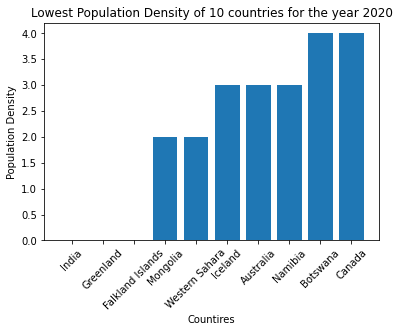

In [ ]:
import numpy as np # as required
top10 = df.sort_values('density(p/km²)', ascending = True).head(10) # bottom 10 countries
plt.xticks(rotation = '45')
plt.title('Lowest Population Density of 10 countries for the year 2020') # title of the plot
plt.xlabel('Countires') # x-axis label
plt.ylabel('Population Density') # y-axis label
plt.bar(top10['country(dependency)'],
        top10['density(p/km²)']
        ) # to show bottom 10 countries

7. Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.



In [76]:
# getting all N.A. values as a max values
max_value = df[df['fert_rate'] == df['fert_rate'].max()]
max_value.head()


,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
19,20,Isle of Man,85033,0.53 %,449,149,570,NaN,N.A.,N.A.,53 %,0.00 %
24,25,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
27,28,Andorra,77265,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
31,32,Dominica,71986,0.25 %,178,96,750,NaN,N.A.,N.A.,74 %,0.00 %


In [77]:
# minimum feritlity rate

min_value = df[df['fert_rate'] == df['fert_rate'].min()]
min_value

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
72,73,South Korea,51269185,0.09 %,43877,527,97230,11731.0,1.1,44,82 %,0.66 %


south korea has the minimum fertility rate

In [ ]:
df.sort_values(by='fert_rate', ascending=True).tail(10) # to get top 10 countries


,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
57,58,Saint Pierre & Miquelon,5794,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %
54,55,Marshall Islands,59190,0.68 %,399,329,180,NaN,N.A.,N.A.,70 %,0.00 %
48,49,Saint Helena,6077,0.30 %,18,16,390,NaN,N.A.,N.A.,27 %,0.00 %
47,48,Bermuda,62278,-0.36 %,-228,1246,50,NaN,N.A.,N.A.,97 %,0.00 %
189,190,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
191,192,Anguilla,15003,0.90 %,134,167,90,NaN,N.A.,N.A.,N.A.,0.00 %
40,41,Cayman Islands,65722,1.19 %,774,274,240,NaN,N.A.,N.A.,97 %,0.00 %
197,198,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
175,176,Palau,18094,0.48 %,86,39,460,NaN,N.A.,N.A.,N.A.,0.00 %
117,118,Gibraltar,33691,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %


In [ ]:
df.sort_values(by='fert_rate', ascending=True).head(10) # to get bottom 10 values

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
72,73,South Korea,51269185,0.09 %,43877,527,97230,11731.0,1.1,44,82 %,0.66 %
56,57,Singapore,5850342,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
137,138,Puerto Rico,2860853,-2.47 %,-72555,323,8870,-97986.0,1.2,44,N.A.,0.04 %
43,44,Macao,649335,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
153,154,Taiwan,23816775,0.18 %,42899,673,35410,30001.0,1.2,42,79 %,0.31 %
29,30,Hong Kong,7496981,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
231,232,Portugal,10196709,-0.29 %,-29478,111,91590,-6000.0,1.3,46,66 %,0.13 %
228,229,Greece,10423054,-0.48 %,-50401,81,128900,-16000.0,1.3,46,85 %,0.13 %
122,123,Bosnia and Herzegovina,3280819,-0.61 %,-20181,64,51000,-21585.0,1.3,43,52 %,0.04 %
49,50,Italy,60461826,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %


8. Report top 5 largest countries in this word based on land area.



In [ ]:
largest_countries = df.sort_values(by='land_area(km²)', ascending=False) # largest_countries based on land area
largest_countries.head(5) # top 5 largest countries

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,Urban Pop %,world_share
193,194,Russia,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
194,195,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
119,120,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
108,109,Canada,37742154,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
160,161,Brazil,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %


9. Report top 5 countries in this word based on median value.



In [79]:
top_countries = df.sort_values(by='med_age', ascending=False) # top countries based on median age
top_countries.head(5)

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,urban_pop(%),world_share
117,118,Gibraltar,33691,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
218,219,Wallis & Futuna,11239,-1.69 %,-193,80,140,NaN,N.A.,N.A.,0 %,0.00 %
40,41,Cayman Islands,65722,1.19 %,774,274,240,NaN,N.A.,N.A.,97 %,0.00 %
210,211,Tuvalu,11792,1.25 %,146,393,30,NaN,N.A.,N.A.,62 %,0.00 %
47,48,Bermuda,62278,-0.36 %,-228,1246,50,NaN,N.A.,N.A.,97 %,0.00 %


10.Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.



Distribution of population column:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


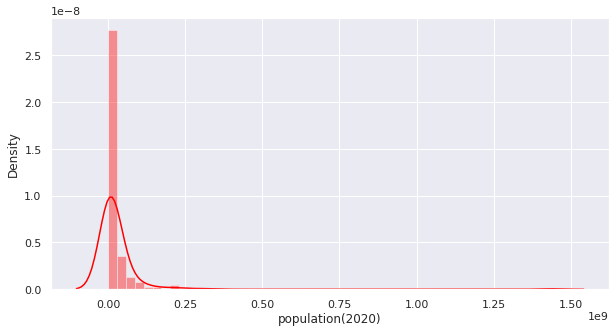

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(a=df['population(2020)'], color='red',
             hist_kws={"edgecolor": 'white'})

By looking at the above graph the data is right skewed

Distribution of yearly change column:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


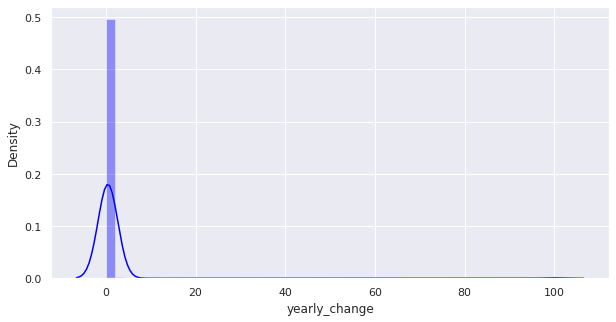

In [ ]:
import seaborn as sns
d_type = lambda x:float(x[1:-1])
yearly_c = df.yearly_change.apply(d_type) # to change to the data type object ot float

sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(a=yearly_c, color='blue',
             hist_kws={"edgecolor": 'white'})



by looking at the above graph, It is normally distributed

Rearding urban population and med age:

we are not able to show the distribution because we have some N.A. values so as mentioned in the project(do not remove or fill it) we didn't do anything. Than't the reason we are not able to show the distribution for those two columns

11. Please sort the population column based on lowest populated countries and report bottom 10 countries as well as top 10 countries.

**Lowest populated Countries :**

In [ ]:
populated_countries = df.sort_values(by='population(2020)')
populated_countries.head(10)

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,Urban Pop %,world_share
234,235,India,0,-100.00 %,-1366417754,0,2973190,-532687.0,2.2,28,N.A.,0.00 %
24,25,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
197,198,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
189,190,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
113,114,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
78,79,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
57,58,Saint Pierre & Miquelon,5794,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %
48,49,Saint Helena,6077,0.30 %,18,16,390,NaN,N.A.,N.A.,27 %,0.00 %
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
223,224,Nauru,10824,0.63 %,68,541,20,NaN,N.A.,N.A.,N.A.,0.00 %


This is the visual representation for the above question

In [ ]:
# To retrieve the lowest population countries values.
lowest_pop=df[['population(2020)','country(dependency)']].sort_values(by='population(2020)',ascending=True).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  This is separate from the ipykernel package so we can avoid doing imports until


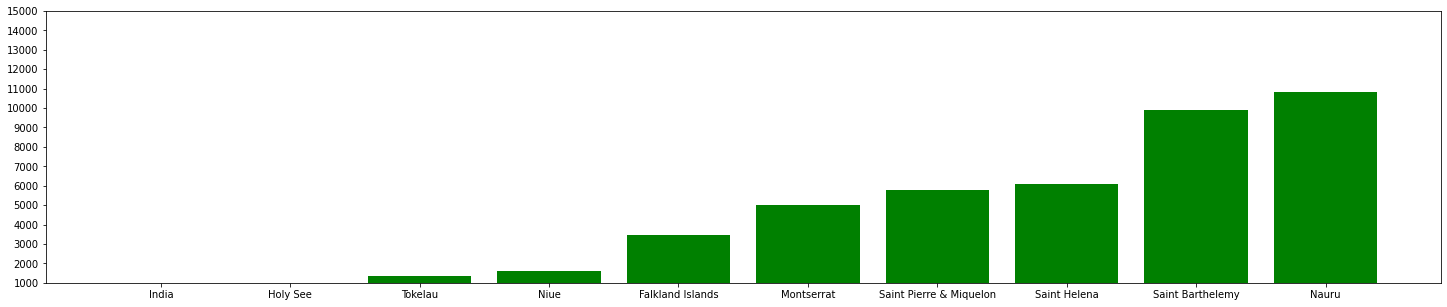

In [ ]:
plt.rcParams['figure.figsize'] = (25, 5) # figure size
plt.bar(lowest_pop['country(dependency)'],lowest_pop['population(2020)'],width=0.8,color='g') # lowest population by using bar graph
plt.locator_params(nbins = 20)
plt.ylim(ymin=1000,ymax=15000) # min and max values of the y-axis
plt.show()

**Highest Populated countries :**

In [ ]:
populated_countries.tail(10).sort_values(by='population(2020)', ascending=False)

,no,country(dependency),population(2020),yearly_change,net_change,density(p/km²),land_area(km²),migrants(net),fert_rate,med_age,Urban Pop %,world_share
194,195,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
119,120,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
142,143,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
156,157,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
160,161,Brazil,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
164,165,Nigeria,206139589,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
186,187,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
193,194,Russia,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
202,203,Mexico,128932753,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %
204,205,Japan,126476461,-0.30 %,-383840,347,364555,71560.0,1.4,48,92 %,1.62 %


This is the visual representation of the above question

In [89]:
# To retrieve the highest population countries values
highest_pop=df[['population(2020)','country(dependency)']].sort_values(by='population(2020)',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  after removing the cwd from sys.path.


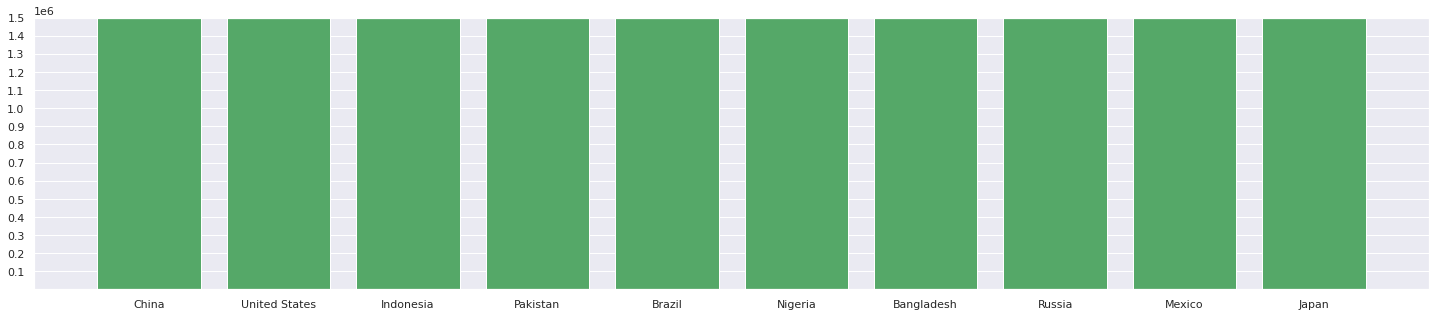

In [90]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 5)
plt.bar(highest_pop['country(dependency)'],highest_pop['population(2020)'],width=0.8,color='g')
plt.locator_params(nbins = 20)
plt.ylim(ymin=1000,ymax=1500000)
plt.show()

**PART 2**

1.Standard -




1.   Attributes: Std name, No of enrolled students, Overall GPA
2.   Methods: getStd, getEnrolled, getOGPA




    





In [80]:
class Standard(): # super class
  def __init__(self,std_name,no_of_enrolled_students,overall_GPA):
    self.std_name=std_name
    self.no_of_enrolled_students=no_of_enrolled_students
    self.overall_GPA=overall_GPA
    
  # these all are the methods of a super class  
  def getStd(self):
    print("std name is", self.std_name)
  def getEnrolled(self):
    print("no of students enrolled:", self.no_of_enrolled_students)
  def getOGPA(self):
    print(" Overall GPA:", self.Overall_GPA)

2. Students class with Standard as its super class  - 
     1. Attributes: Name,Roll No., Standard, Math marks, English Marks, Science Marks, Social Marks
     2. Methods: getName, getRollNo, getStd, getGPA





In [83]:
class Students(Standard):# child class inherited from super class standard 
  def __init__(self,name,roll_no,standard, math_marks, english_marks,science_marks,social_marks):
    self.name=name
    self.roll_no=roll_no
    self.standard=standard
    self.math_marks=math_marks
    self.english_marks=english_marks
    self.science_marks=science_marks
    self.social_marks=social_marks
    self.total=self.math_marks+self.english_marks+self.science_marks+self.social_marks
    self.gpa=self.total/4

  # these all are the methods for child class  
  def getName(self):
    print("Name is:",self.name)
  def getRollNo(self):
    print("Roll no is", self.roll_no)
  def getStd(self):
    print("Standard is",self.standard)  
  def getGPA(self):
    print("GPA is",self.gpa) 

In [87]:
a=Students('jyothi',12,12,8,7,8,8) # constructor
a.getName() # getName method
a.getRollNo() # getRollNo method
a.getStd() # getStd method
a.getGPA() # getGPA method

Name is: jyothi
Roll no is 12
Standard is 12
GPA is 7.75
